# Studying the Impact of Diabetes on the Human Body
&#x1F3E5;
---

## Exploratory Data Analysis

### Import Required Libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [136]:
clean_data = pd.read_csv('..\Data\cleaned_data.csv')

### Data Inspection & Univariate Analysis

Preliminary data inspection, univariate analysis, and correlation is available in the accompanying file [data_cleaning.ipynb](data_cleaning.ipynb)


### Bivariate Analysis

In [137]:
# Creates a mapping to treat the diabetes variable as categorical
diabetes_cat_map = {1: 'Diabetic', 0: 'Non-Diabetic'}

##### Numerical Variables

**Diabetes & Age**

C:\Users\i.madiedo.soto\AppData\Local\Temp\ipykernel_16136\1240555740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(clean_data, x='age', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')


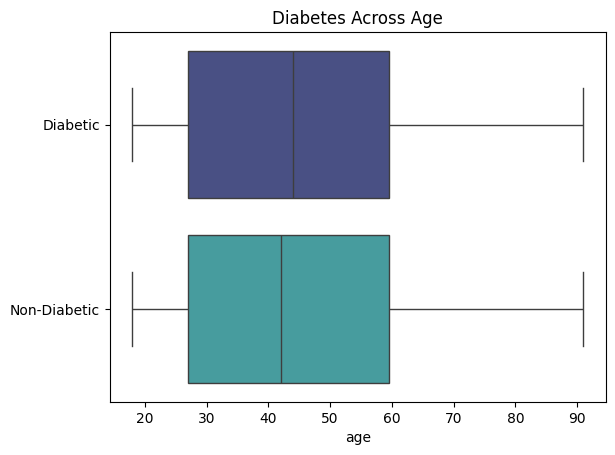

In [138]:
# Diabetes and age boxplot
plt.figure()
sns.boxplot(clean_data, x='age', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.title('Diabetes Across Age')
plt.show()

**Diabetes & BMI**

C:\Users\i.madiedo.soto\AppData\Local\Temp\ipykernel_16136\2387920688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(clean_data, x='BMI', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')


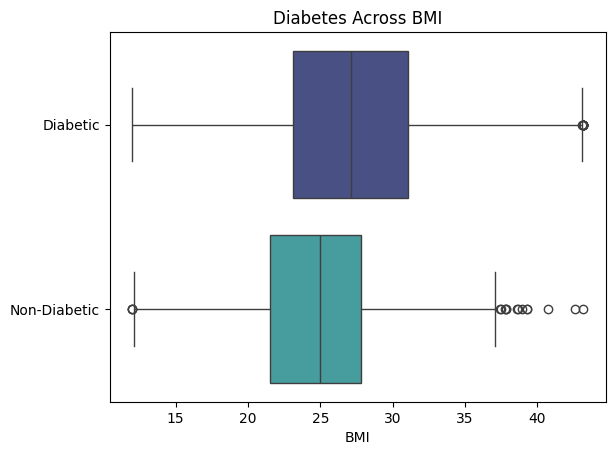

In [139]:
# Diabetes and BMI boxplot
plt.figure()
sns.boxplot(clean_data, x='BMI', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.title('Diabetes Across BMI')
plt.show()

**Diabetes & Weight**

C:\Users\i.madiedo.soto\AppData\Local\Temp\ipykernel_16136\575047177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(clean_data, x='weight', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')


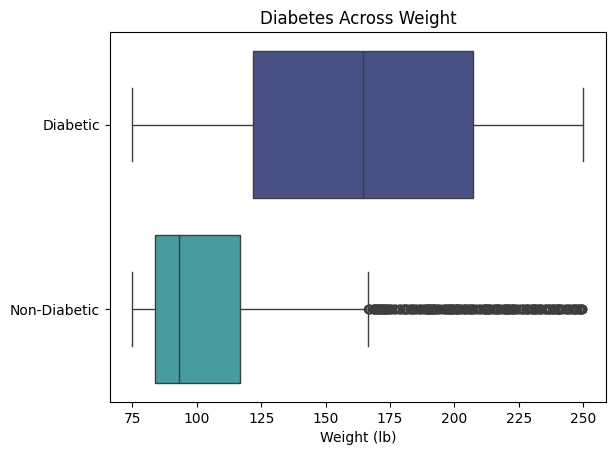

In [140]:
# Diabetes and Weight boxplot
plt.figure()
sns.boxplot(clean_data, x='weight', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.xlabel('Weight (lb)')
plt.title('Diabetes Across Weight')
plt.show()

**Diabetes & Sleep Duration**

C:\Users\i.madiedo.soto\AppData\Local\Temp\ipykernel_16136\3719840682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(clean_data, x='sleep_duration', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')


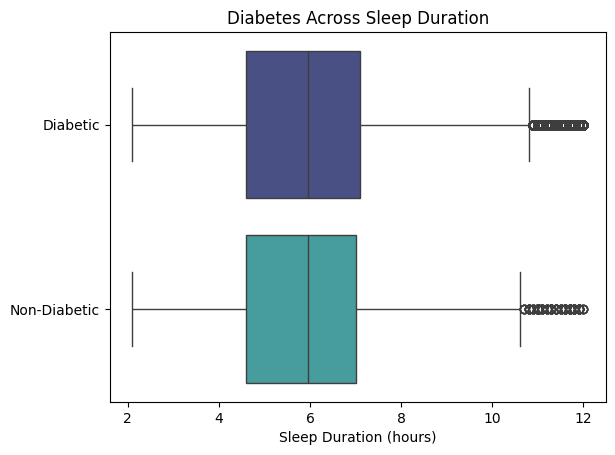

In [141]:
# Diabetes and Sleep Duration boxplot
plt.figure()
sns.boxplot(clean_data, x='sleep_duration', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.xlabel('Sleep Duration (hours)')
plt.title('Diabetes Across Sleep Duration')
plt.show()

**Diabetes & Pregnancies in Women**

C:\Users\i.madiedo.soto\AppData\Local\Temp\ipykernel_16136\277336913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(clean_data[clean_data['gender'] == 'female'], x='pregnancies', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')


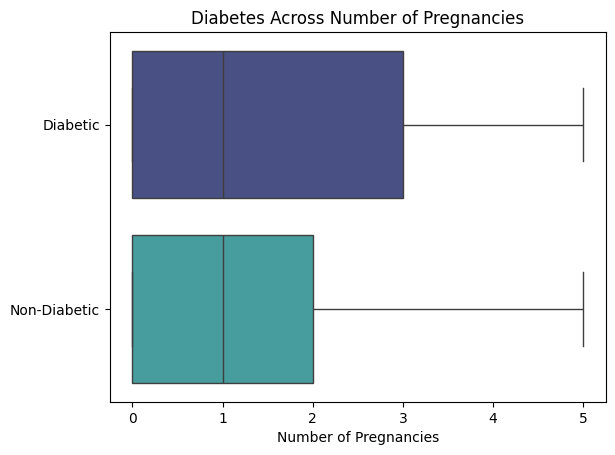

In [142]:
# Diabetes and Pregnancies (Women) boxplot
plt.figure()
sns.boxplot(clean_data[clean_data['gender'] == 'female'], x='pregnancies', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.xlabel('Number of Pregnancies')
plt.title('Diabetes Across Number of Pregnancies')
plt.show()

**Diabetes & Diabetes Pedigree Function**

C:\Users\i.madiedo.soto\AppData\Local\Temp\ipykernel_16136\3382978616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(clean_data, x='diabetes_pedigree_function', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')


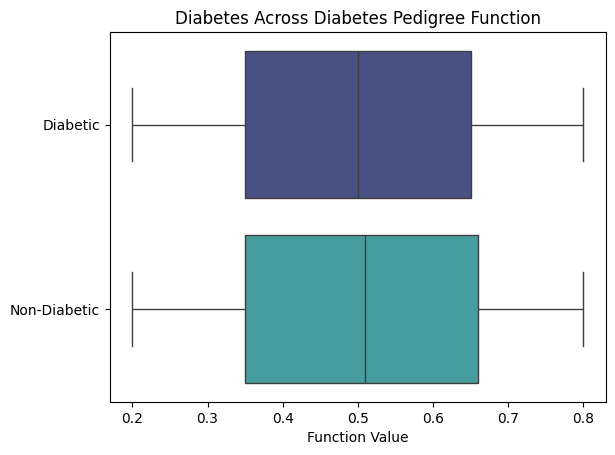

In [143]:
# Diabetes and diabetes pedigree function boxplot
plt.figure()
sns.boxplot(clean_data, x='diabetes_pedigree_function', y=clean_data['diabetes'].map(diabetes_cat_map), palette='mako')
plt.ylabel('')
plt.xlabel('Function Value')
plt.title('Diabetes Across Diabetes Pedigree Function')
plt.show()

##### Categorical Variables

In [144]:
# Create a function to generated a percentage staked bar graph for the analysis of cat variables

def stacked_viz(col, colors, title, legend, pos, order):

    """
    Creates a stacked bar chart showing the percentage of diabetes acros categories

    Parameters:
        col: categorical variable to review
        colors: number of palette colours required (equals the number of categories)
        title: title for the graph
        legend: title for the graph's legend
        pos: legend position

    Returns:
        tuple: A tuple containing:
            - fig: The figure object for the plot
            - ax: The axes object for the plot
    """

    grouped = clean_data.groupby(['diabetes', col]).size().reset_index(name='count')
    grouped[col] = pd.Categorical(grouped[col], categories=order, ordered=True)
    grouped['percent'] = grouped['count'] / grouped.groupby('diabetes')['count'].transform('sum') * 100
    grouped['diabetes_cat'] = grouped['diabetes'].map(diabetes_cat_map)
    pivot = grouped.pivot(index='diabetes_cat', columns=col, values='percent').fillna(0)

    # Stacked barplot
    fig, ax = plt.subplots()
    bars = pivot.plot(kind='barh', stacked=True, ax=ax, color=sns.color_palette("mako", n_colors=colors))

    for container in ax.containers:
        ax.bar_label(
            container,
            labels = [f'{v:.0f}%' if v > 0.16 else '' for v in container.datavalues], 
            label_type='center' 
        )

    plt.title(title)
    plt.ylabel('')
    plt.xlabel('Percentage (%)')
    plt.legend(title=legend, loc='upper right', bbox_to_anchor=pos)

    return fig, ax

**Diabetes & Gender**

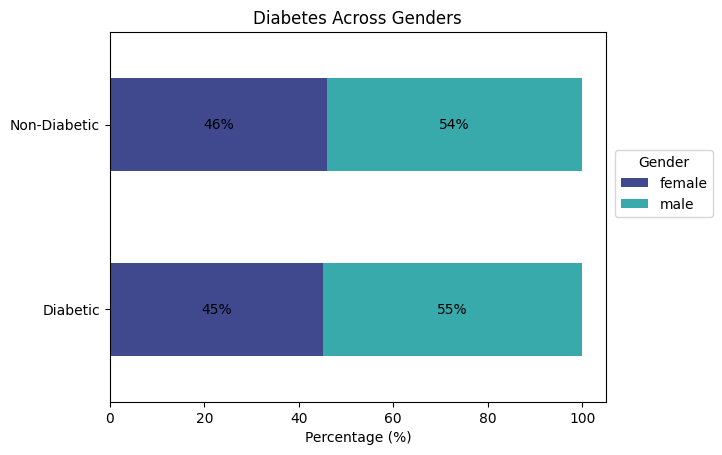

In [145]:
fig , ax = stacked_viz('gender', 2, 'Diabetes Across Genders', 'Gender',(1.23,0.7), ['female', 'male'])

**Diabetes & hypertension**

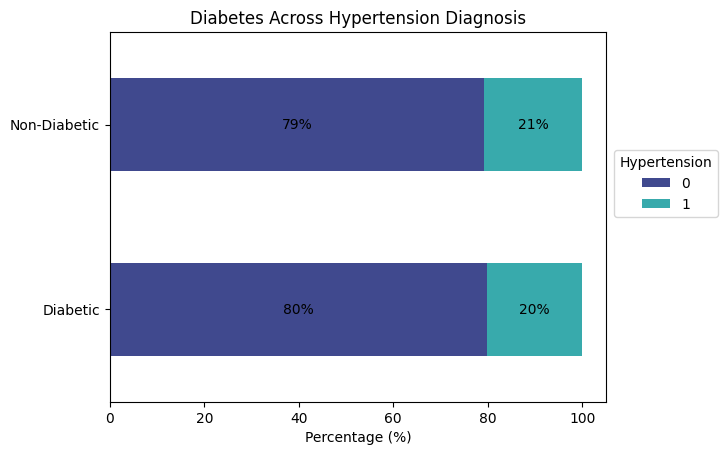

In [146]:
fig , ax = stacked_viz('hypertension', 2, 'Diabetes Across Hypertension Diagnosis', 'Hypertension', (1.24,0.7), [0, 1])

**Diabetes & Diet Type**

**Diabetes & Family Diabetes History**

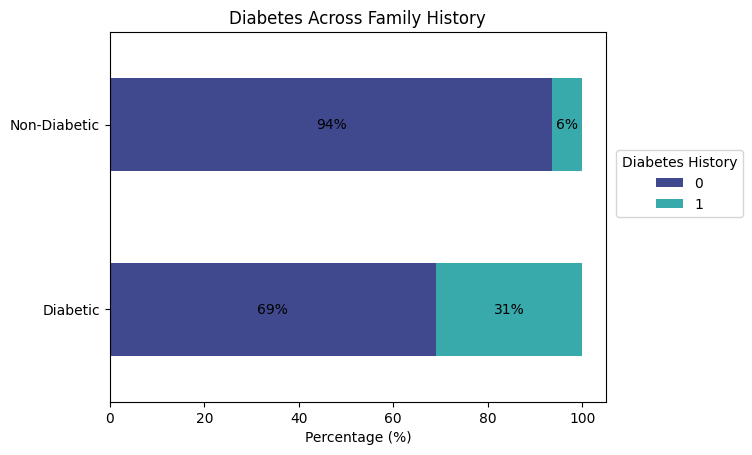

In [147]:
fig , ax = stacked_viz('family_diabetes_history', 2, 'Diabetes Across Family History', 'Diabetes History',(1.29,0.7), [0, 1])

**Diabetes & Physical Activity Level**

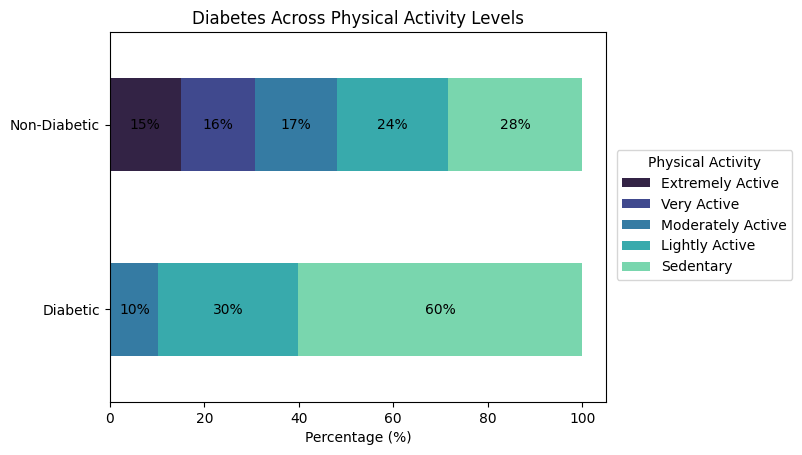

In [148]:
fig , ax = stacked_viz('physical_activity_level', 5, 'Diabetes Across Physical Activity Levels', 'Physical Activity', (1.39,0.7), ['Extremely Active', 'Very Active', 'Moderately Active',
                        'Lightly Active', 'Sedentary'])

**Diabetes & Stress Levels**

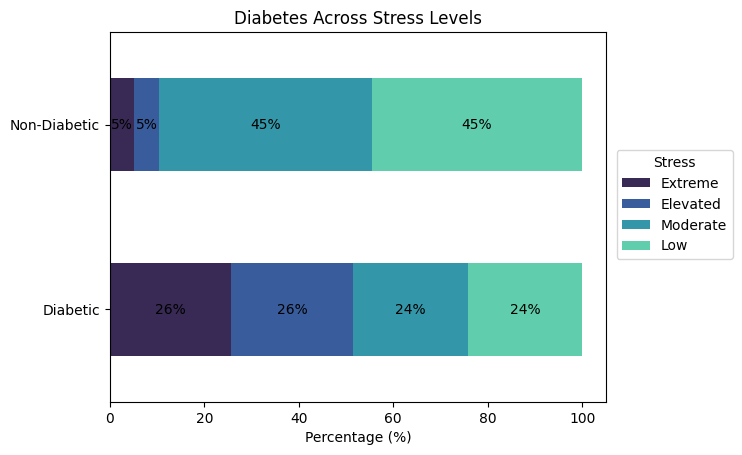

In [149]:
fig , ax = stacked_viz('stress_level', 4, 'Diabetes Across Stress Levels', 'Stress', (1.27,0.7), ['Extreme', 'Elevated', 'Moderate', 'Low'])

**Diabetes & Alcohol Consumption**

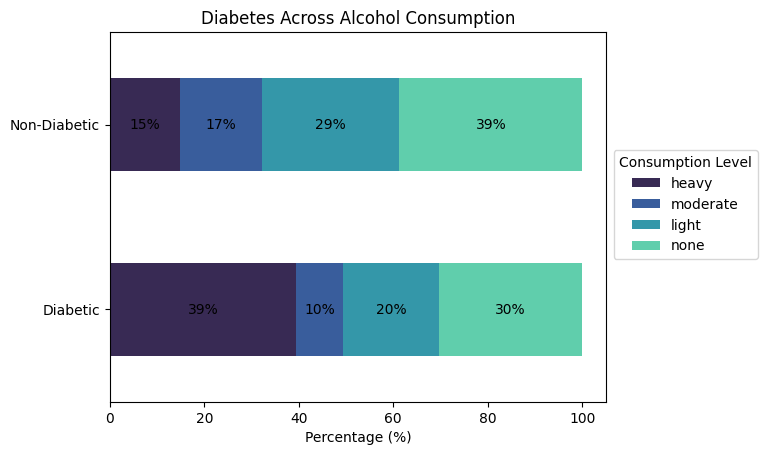

In [150]:
fig , ax = stacked_viz('alcohol_consumption', 4, 'Diabetes Across Alcohol Consumption', 'Consumption Level', (1.32,0.7), ['heavy', 'moderate', 'light', 'none'])